In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import os
path = '/mnt/c/Users/alon4/Dropbox/My PC (LAPTOP-L5MMEHHN)/Desktop/Studies/Lab C1/Molecular Spectroscopy'
files = ['NEXT Cigar.xlsx', 'Marlborro Cigar (1).xlsx', 'LM Cigar 00.xlsx', 'Galuois Cigar (1).xlsx', 'Canadian Cigar.xlsx']
cigars = [file.split(' ')[0] for file in files]
files = [os.path.join(path,'Measurements/Cigar/'+f) for f in files]
def readXlsx(path):
    return pd.read_excel(path).to_numpy().T
plt.rcParams['figure.figsize'] = [30,10]
plt.rcParams.update({'font.size': 28, 'font.weight':'bold'})
plt.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [2]:
CO = ('CO',np.array([[2028,2238]]),'orchid')
CO2 = (r'$\text{CO}_{\text{2}}$', np.array([[2248,2402],[604,705],[717,724]]),'mediumseagreen')
HCN = ('HCN', np.array([[710,716]]),'purple')
METHANOL = ('Methanol', np.array([[1000,1080]]),'saddlebrown')
ETHYLENE = ('Ethylene', np.array([[901,997]]),'grey')
ISOPRENE = ('Isoprene', np.array([[889,897]]),'red')
METHANE = ('Methane', np.array([[1300,1307],[2820,3200]]),'green')
ACETALDEHYDE = ('Acetaldehyde', np.array([[1720,1780]]),'black')
H2O = ('Water', np.array([[1325,1994]]),'blue')
chomers = [CO,CO2,HCN,METHANOL,ETHYLENE,ISOPRENE,METHANE,ACETALDEHYDE,H2O]

/mnt/c/Users/alon4/Dropbox/My PC (LAPTOP-L5MMEHHN)/Desktop/Studies/Lab C1/Molecular Spectroscopy/Measurements/Cigar/NEXT Cigar.xlsx


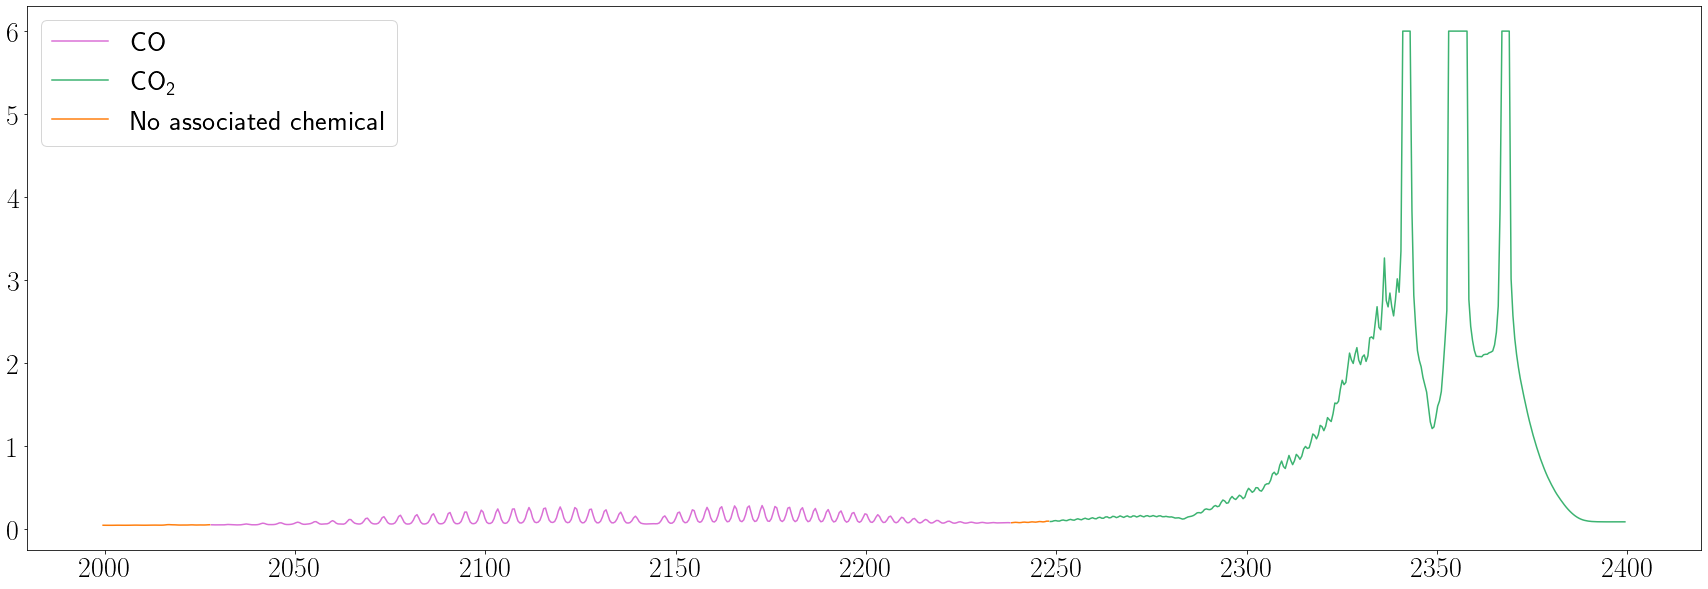

/mnt/c/Users/alon4/Dropbox/My PC (LAPTOP-L5MMEHHN)/Desktop/Studies/Lab C1/Molecular Spectroscopy/Measurements/Cigar/Marlborro Cigar (1).xlsx


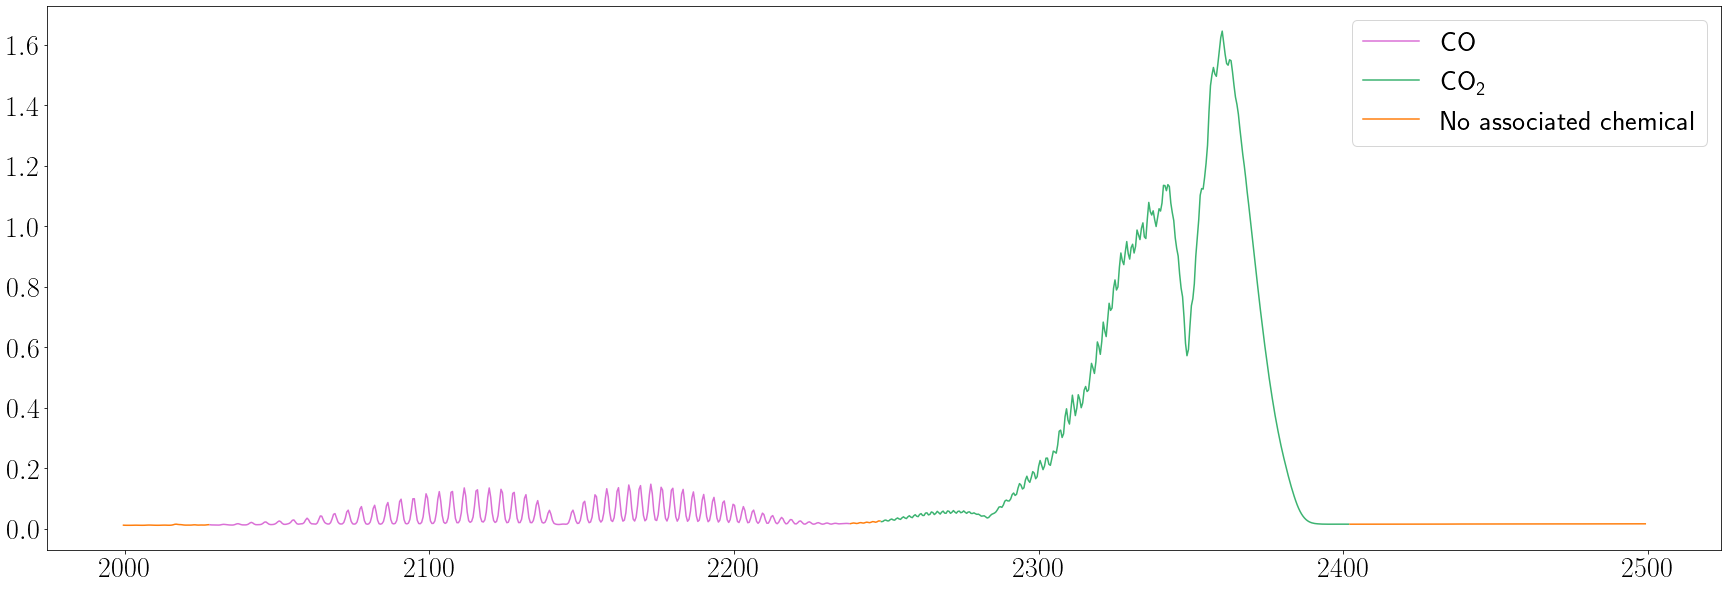

/mnt/c/Users/alon4/Dropbox/My PC (LAPTOP-L5MMEHHN)/Desktop/Studies/Lab C1/Molecular Spectroscopy/Measurements/Cigar/LM Cigar 00.xlsx


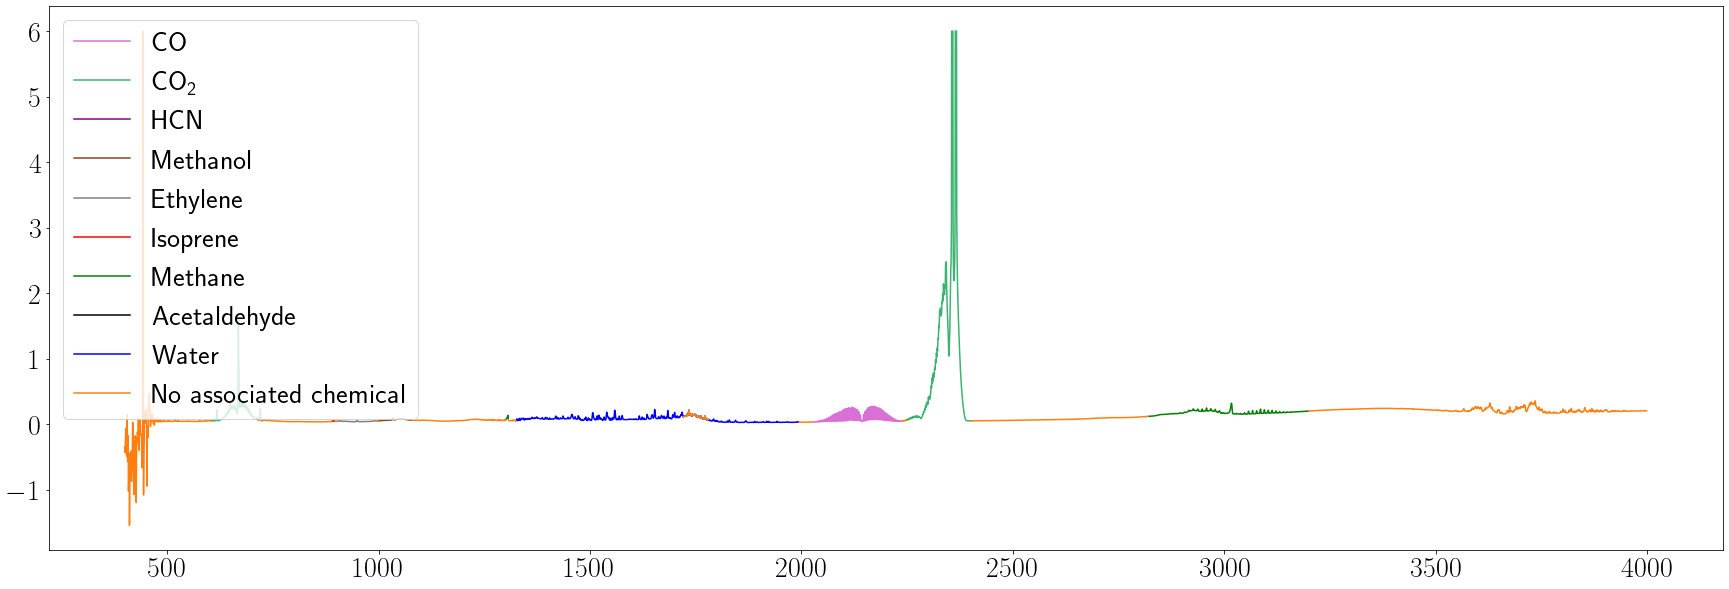

/mnt/c/Users/alon4/Dropbox/My PC (LAPTOP-L5MMEHHN)/Desktop/Studies/Lab C1/Molecular Spectroscopy/Measurements/Cigar/Galuois Cigar (1).xlsx


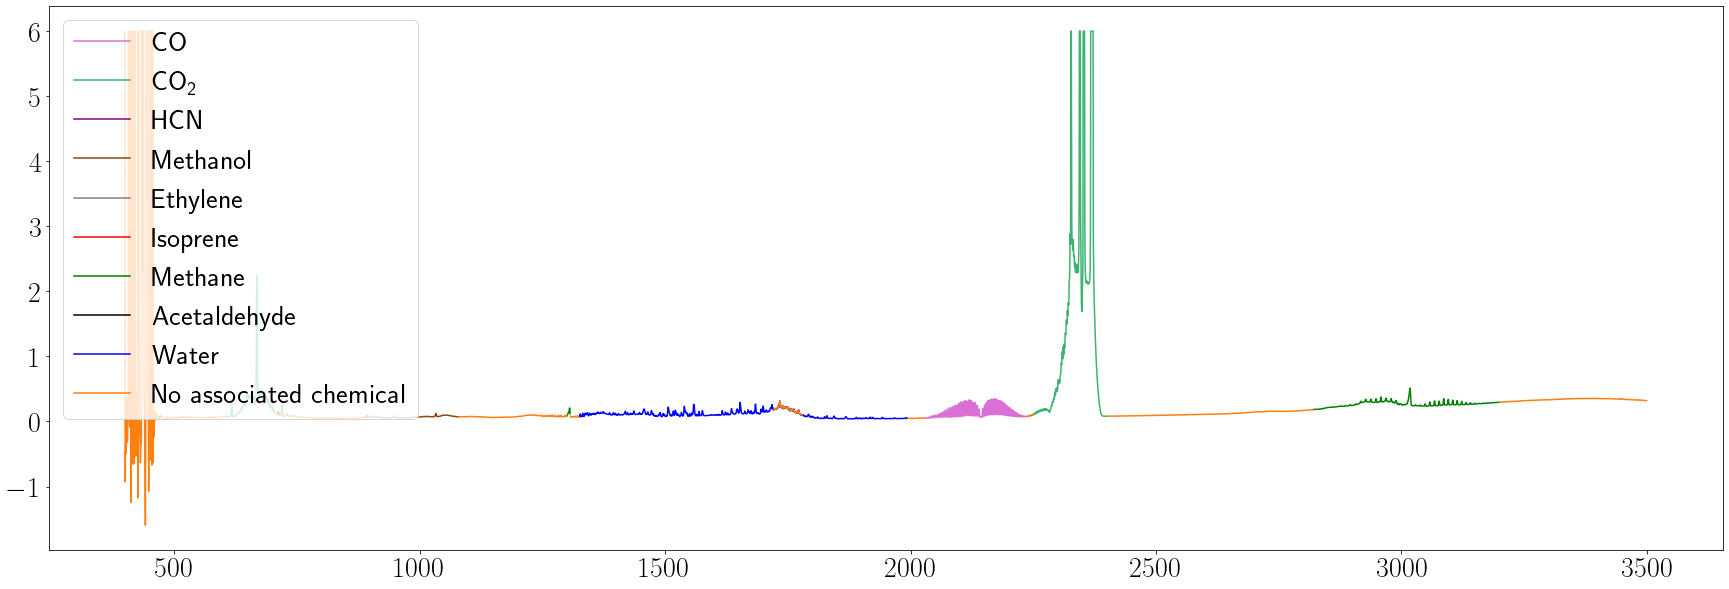

/mnt/c/Users/alon4/Dropbox/My PC (LAPTOP-L5MMEHHN)/Desktop/Studies/Lab C1/Molecular Spectroscopy/Measurements/Cigar/Canadian Cigar.xlsx


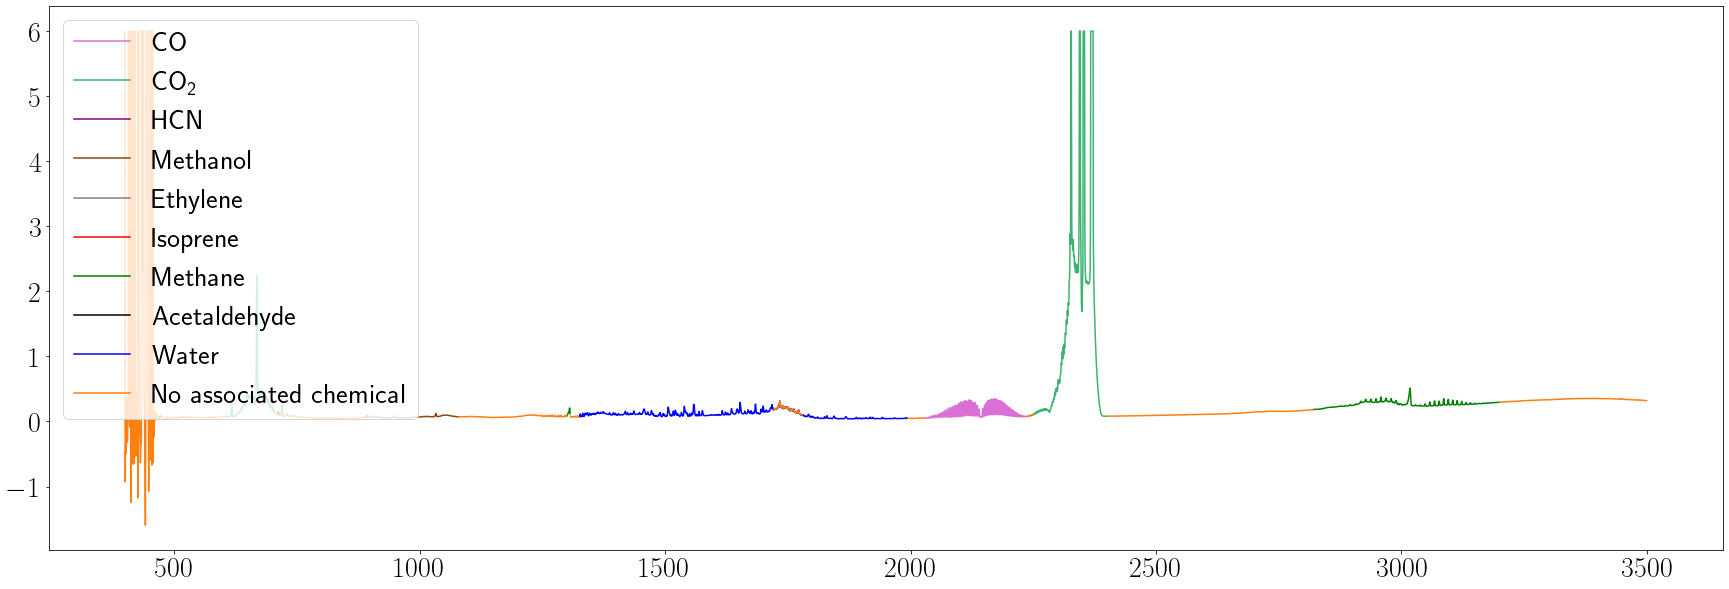

In [3]:
for i in range(len(files)):
    spectrum = readXlsx(files[i]) # [[Wavenumber], [Absorbance]]
    sumMask = np.zeros_like(spectrum[0])
    print(files[i])
    
    fig, ax = plt.subplots()
    plots=[]
    labels = []
    for chem in chomers:
        masks = [np.ma.masked_inside(spectrum[0],*reg).mask for reg in chem[1]]
        for mask in masks:
            sumMask += mask
            if np.sum(mask) > 1 and chem[0] not in labels:
                labels.append(chem[0])
                curves, = ax.plot(spectrum[0][mask],spectrum[1][mask],color=chem[2])
                plots.append(curves)
            else:
                ax.plot(spectrum[0][mask],spectrum[1][mask],color=chem[2])
    
    sumMask = 1-sumMask
    sumMask = sumMask.astype(bool)
    masks = []
    start = 0
    j=0
    while j<len(sumMask):
        if sumMask[j]:
            start = j
            while j<len(sumMask) and sumMask[j]:
                j+=1
            masks.append([start,j-1])
        j+=1
    for mask in masks:
        if 'No associated chemical' not in labels:
            curves, = ax.plot(spectrum[0][mask[0]:mask[1]+1],spectrum[1][mask[0]:mask[1]+1], color = 'tab:orange')
            plots.append(curves)
            labels.append('No associated chemical')
        else:
            ax.plot(spectrum[0][mask[0]:mask[1]+1],spectrum[1][mask[0]:mask[1]+1], color = 'tab:orange')
    
    ax.legend(plots, labels)
    plt.savefig(os.path.join(path, f"Analysis/Colored Cigar Spectrums/{cigars[i]}_Spectrum.png"))
    plt.show()